In [1]:
import os
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d as spline

import TwoPUtils as tpu
import STX3KO_analyses as stx

rng = np.random.default_rng()

%matplotlib inline


%load_ext autoreload
%autoreload 2

In [31]:
nl_kwta = stx.wta.KWTA(eta=0, tau=0, w_norm_decay = 0,ca1_noise= .5, w_sigma_mag = 1E-1, ca3_sigma_mag=.05, weight_dist = 'uniform' )

In [32]:
nl_kwta.ca3.shape

(1000, 30)

(1000, 1000)
(1000, 30)


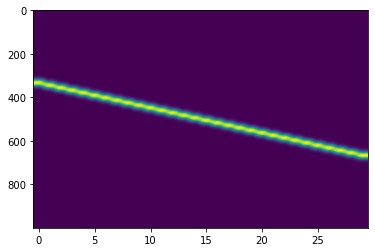

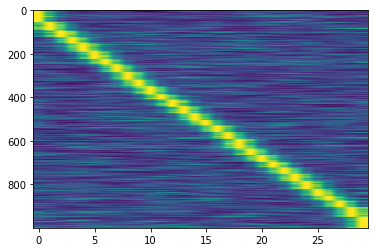

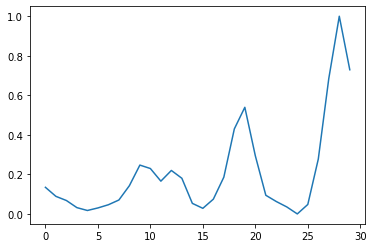

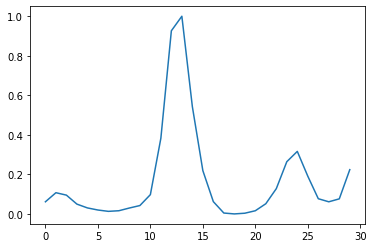

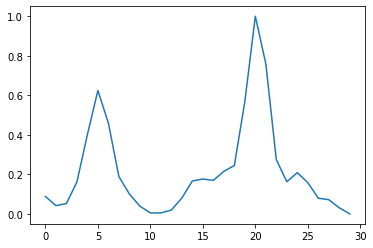

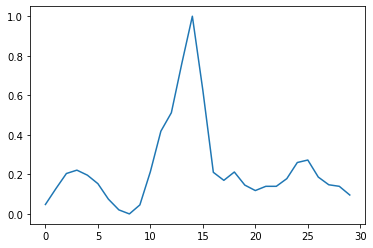

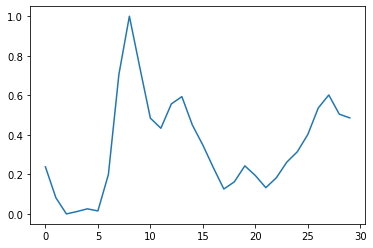

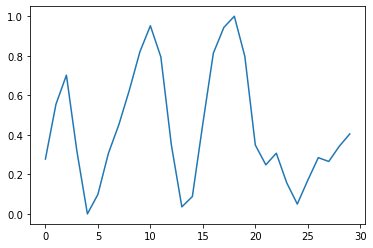

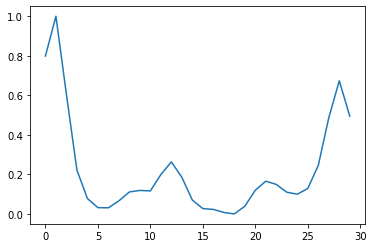

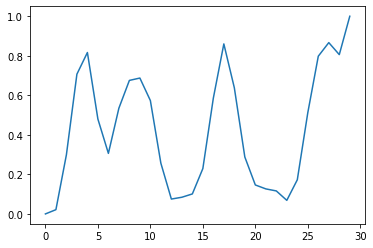

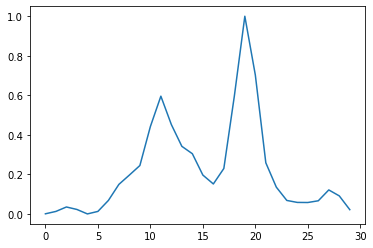

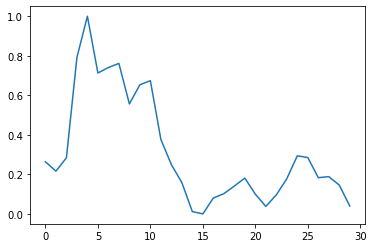

In [33]:
x = np.linspace(0,10, num = 30)[ np.newaxis, :]
mu = np.linspace(-10,20, num = 1000)[: , np.newaxis]
rbfs = tpu.utilities.gaussian(mu, .5, x)

fig, ax = plt.subplots()
ax.imshow(rbfs, aspect = 'auto', vmin = 0, vmax = 1)
w = rng.lognormal(sigma=2, size=[1000, 1000])
print(w.shape)
ca3 = np.matmul(w, rbfs)
ca3 = (ca3 - np.amin(ca3, axis=1, keepdims=True))/(np.amax(ca3, axis=1, keepdims=True) - np.amin(ca3, axis=1, keepdims=True))
# ca3 /= np.mean(ca3, axis=0, keepdims=True)
nl_kwta.ca3 = ca3
fig, ax = plt.subplots()
ax.imshow(nl_kwta.ca3[np.argsort(np.argmax(ca3,axis=1)),:], aspect = 'auto', vmin=0, vmax = 1)
print(rbfs.shape)
# rbfs 

for cell in range(10):
    fig, ax = plt.subplots()
    ax.plot(ca3[cell,:])

In [34]:
nl_ca1 = nl_kwta.run_trials()

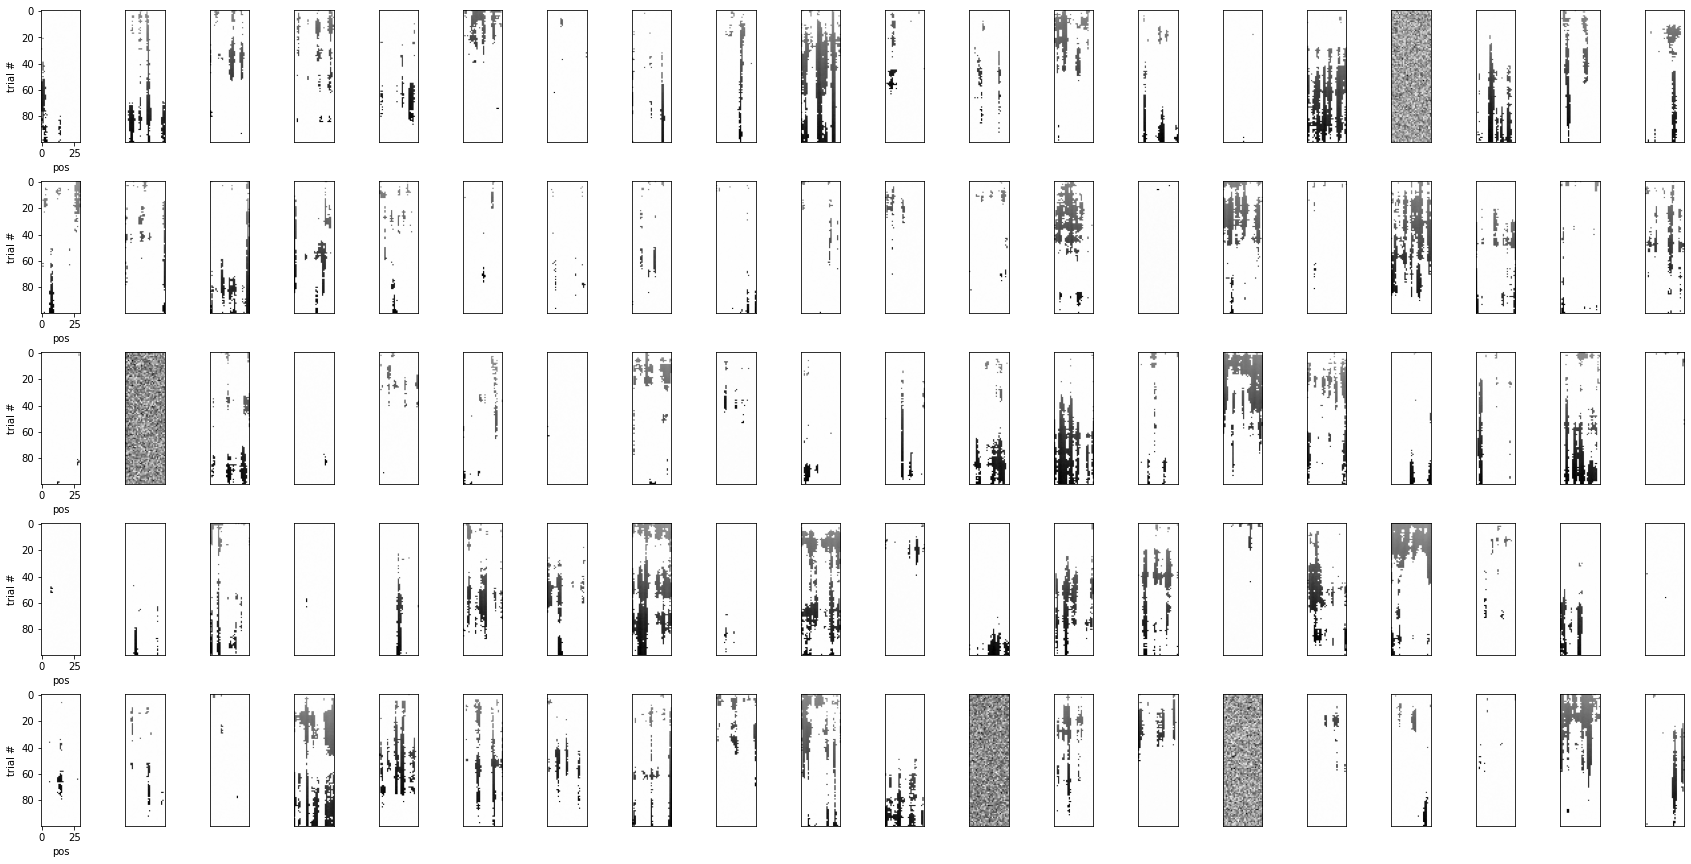

In [35]:
nl_singlecell_fig = stx.wta.plot_cells(nl_ca1, cell_inds = np.arange(0,100))

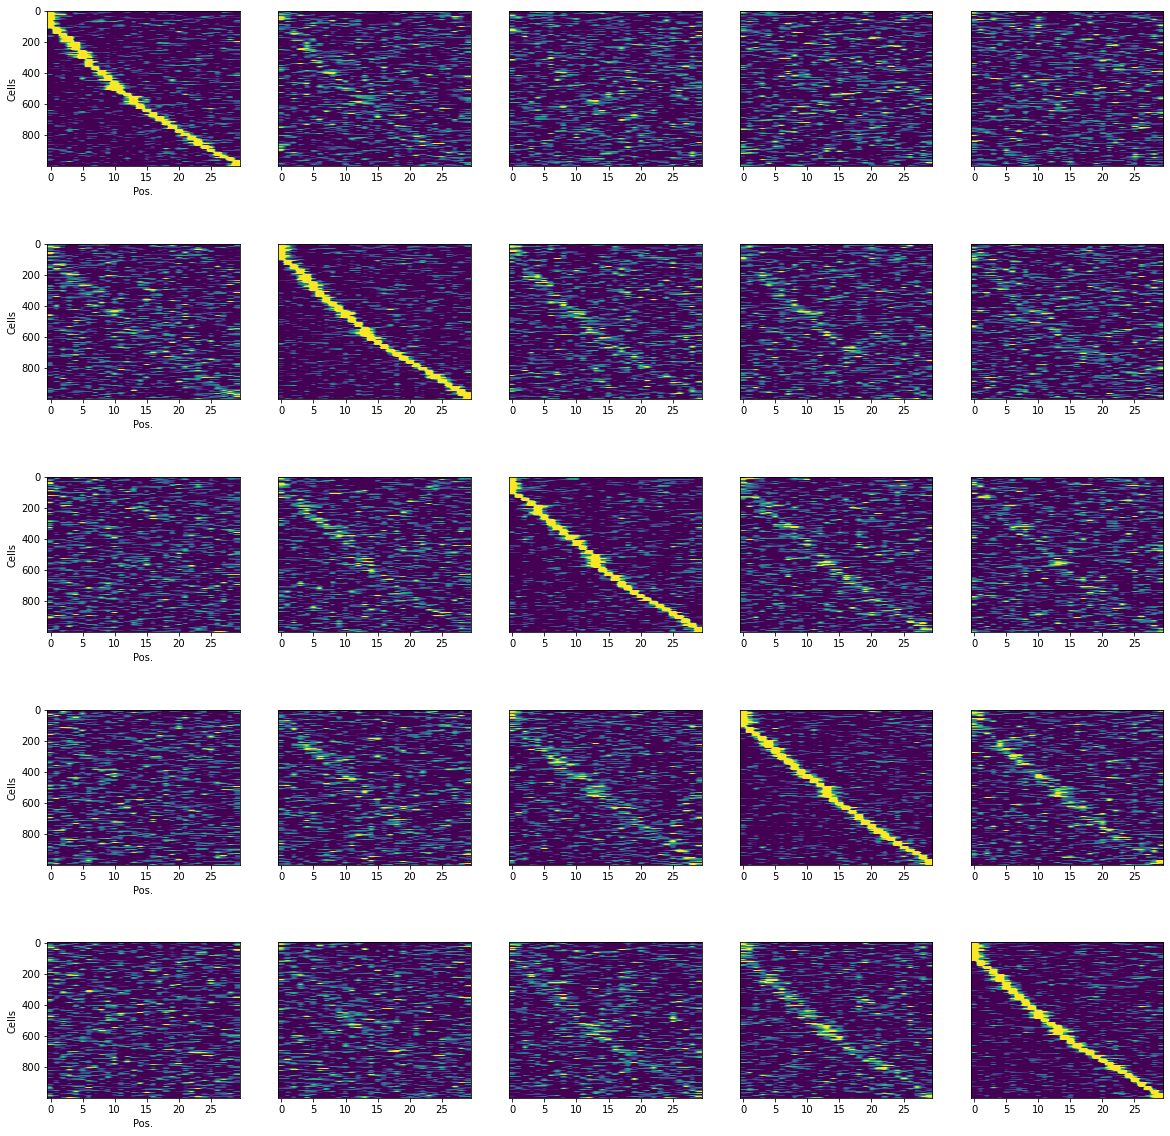

In [36]:
nl_pop_fig = stx.wta.plot_pop_activity(nl_ca1[::20,:,:])

In [28]:
l_kwta = stx.wta.KWTA(eta=1E-4, tau=1E-5, w_norm_decay = 0,ca1_noise= .5, w_sigma_mag = 1E-1, ca3_sigma_mag = .05)
l_kwta.ca3 = ca3
l_ca1 = l_kwta.run_trials()

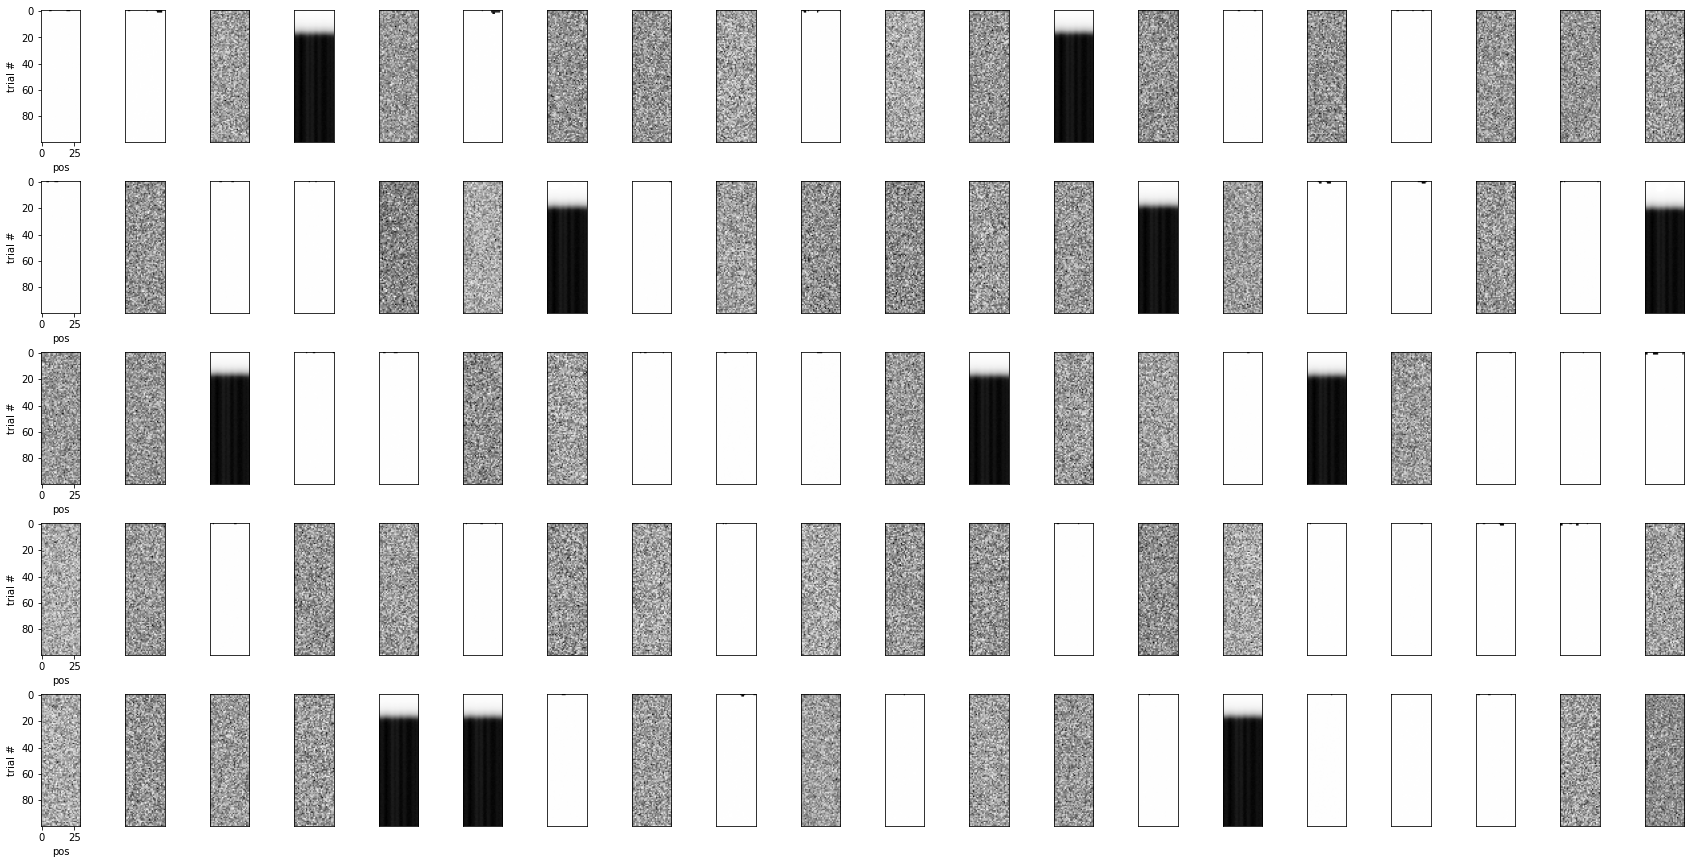

In [29]:
l_singlecell_fig = stx.wta.plot_cells(l_ca1, cell_inds = np.arange(0,100))

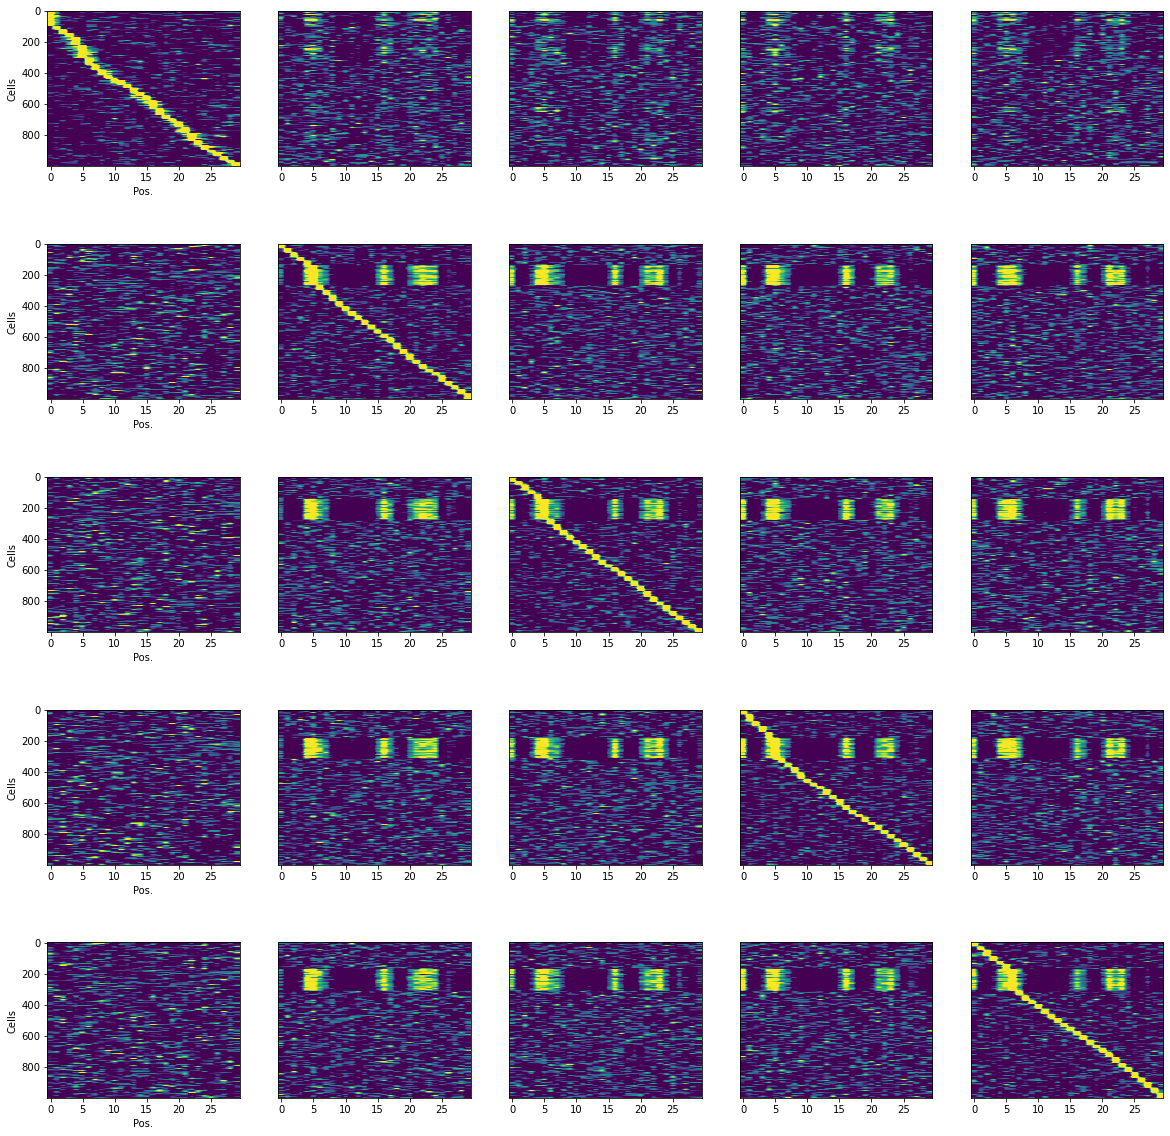

In [30]:
l_pop_fig = stx.wta.plot_pop_activity(l_ca1[::20,:,:])